Health Care Project

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
dt=pd.read_excel('Health_Care_dataset.xlsx')
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dt.shape

(303, 14)

In [4]:
dt.isnull().values.any()

False

In [5]:
data=dt
young_ages=data[(data.age>=29)&(data.age<40)]
middle_ages=data[(data.age>=40)&(data.age<55)]
elderly_ages=data[(data.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


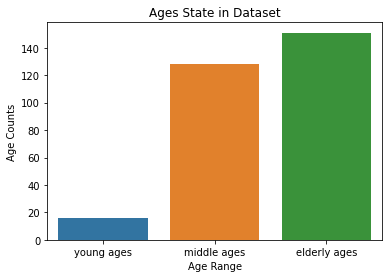

In [6]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

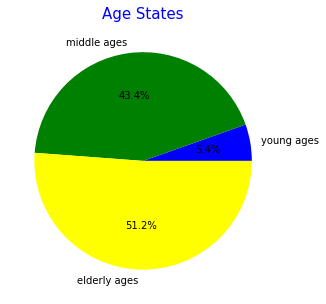

In [7]:
colors = ['blue','green','yellow']
plt.figure(figsize = (5,5))
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'],colors=colors, autopct='%1.1f%%')
plt.title('Age States',color = 'blue',fontsize = 15)
plt.show()

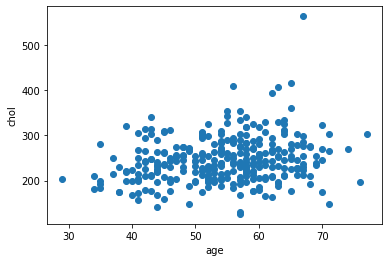

In [8]:
dt=dt
plt.scatter(dt['age'],dt['chol'])
plt.xlabel("age")
plt.ylabel("chol")
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

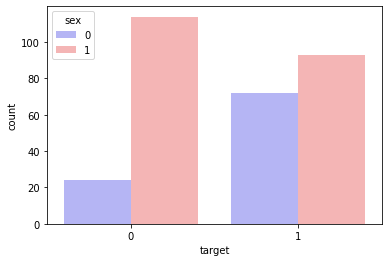

In [9]:
sns.countplot(data=dt, x="target", hue="sex", palette="bwr")

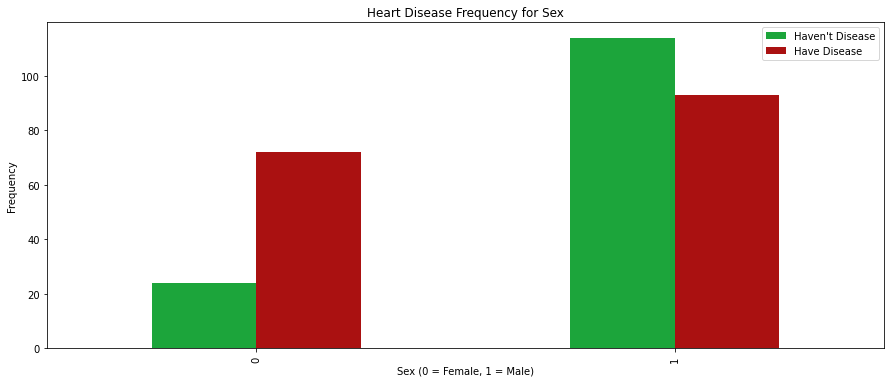

In [10]:
pd.crosstab(dt.sex,dt.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [11]:
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


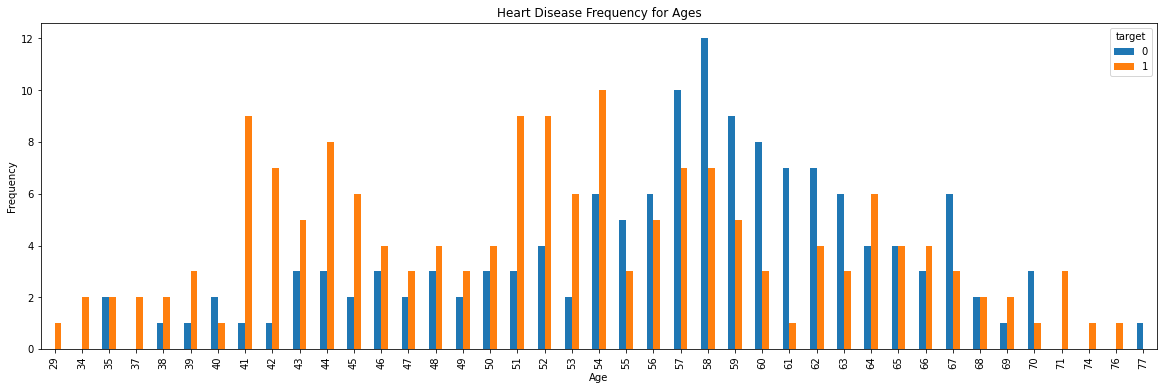

In [12]:
pd.crosstab(dt.age,dt.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [13]:
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'
dt['chest_pain_type'][dt['chest_pain_type'] == 0] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [14]:
dt.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1


<AxesSubplot:xlabel='target', ylabel='count'>

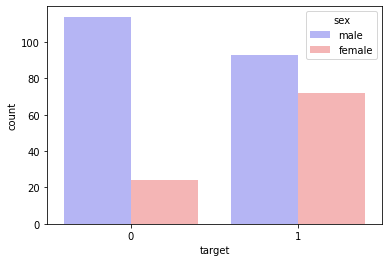

In [15]:
sns.countplot(data=dt, x="target", hue="sex", palette="bwr")

In [16]:
d1=pd.get_dummies(dt.sex)
d2=pd.get_dummies(dt.chest_pain_type)
d3=pd.get_dummies(dt.fasting_blood_sugar)
d4=pd.get_dummies(dt.rest_ecg)
d5=pd.get_dummies(dt.exercise_induced_angina)
d6=pd.get_dummies(dt.st_slope)
d7=pd.get_dummies(dt.thalassemia)

In [17]:
dt.drop(['sex','chest_pain_type','fasting_blood_sugar', 'rest_ecg','exercise_induced_angina','st_slope','thalassemia'],axis=1,inplace=True )
dt= pd.concat([dt,d1,d2,d3,d4,d5,d6,d7],axis=1)

In [18]:
dt.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,female,male,asymptomatic,...,normal,no,yes,0,flat,upsloping,0,fixed defect,normal,reversable defect
0,63,145,233,150,2.3,0,1,0,1,1,...,1,1,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,1,0,0,...,1,1,0,0,1,0,0,1,0,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,57,120,354,163,0.6,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [19]:
dt[['male','female']].head()

,male,female
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


In [20]:
dt.shape

(303, 27)

In [21]:
dt.columns

Index([                         'age',       'resting_blood_pressure',
                        'cholesterol',      'max_heart_rate_achieved',
                      'st_depression',            'num_major_vessels',
                             'target',                       'female',
                               'male',                 'asymptomatic',
                    'atypical angina',             'non-anginal pain',
                     'typical angina',        'greater than 120mg/ml',
                'lower than 120mg/ml',        'ST-T wave abnormality',
       'left ventricular hypertrophy',                       'normal',
                                 'no',                          'yes',
                                    0,                         'flat',
                          'upsloping',                              0,
                       'fixed defect',                       'normal',
                  'reversable defect'],
      dtype='object')

# Applying Logistic Regression

In [22]:
X=dt.drop(["target"],axis=1)
y=dt.target

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [26]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [27]:
predictions=model.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [28]:
from sklearn.metrics import classification_report

In [29]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.85      0.92      0.88        25\n           1       0.94      0.89      0.91        36\n\n    accuracy                           0.90        61\n   macro avg       0.90      0.90      0.90        61\nweighted avg       0.90      0.90      0.90        61\n'

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[23,  2],
       [ 4, 32]])

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,predictions)

0.9016393442622951

# Applying Decission Tree

In [34]:
X=dt.drop(["target"],axis=1)
y=dt.target

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
from sklearn import tree

In [37]:
md=tree.DecisionTreeClassifier()

In [38]:
md.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier()

In [39]:
md.score(X_test,y_test)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8360655737704918

Applying Random Forest

In [40]:
X=dt.drop(["target"],axis=1)
y=dt.target

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier (n_estimators=100)

In [44]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier()

In [45]:
accuracy = rf.score(X_test, y_test)
print("Accuracy = {}%".format(accuracy * 100))

Accuracy = 88.52459016393442%


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [46]:
predictions=rf.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [47]:
from sklearn.metrics import classification_report

CLASSIFICATION REPORT

In [48]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.89      0.86      0.88        29\n           1       0.88      0.91      0.89        32\n\n    accuracy                           0.89        61\n   macro avg       0.89      0.88      0.88        61\nweighted avg       0.89      0.89      0.89        61\n'

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,predictions)

0.8852459016393442

Using Support Vector Machine

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import pandas as pd

x=dt.drop(["target"],axis=1)
y=dt.target
print(x.shape,y.shape)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

(303, 26) (303,)


for linear kernal

In [52]:
obj=SVC(kernel="linear")
obj.fit(xtrain,ytrain)
predict=obj.predict(xtest)
print("accc score",accuracy_score(predict,ytest))
print("confussion matrix",confusion_matrix(predict,ytest))
print("classification report",classification_report(predict,ytest))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


accc score 0.8461538461538461
confussion matrix [[30  3]
 [11 47]]
classification report               precision    recall  f1-score   support

           0       0.73      0.91      0.81        33
           1       0.94      0.81      0.87        58

    accuracy                           0.85        91
   macro avg       0.84      0.86      0.84        91
weighted avg       0.86      0.85      0.85        91



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


rbf kernal

In [54]:
obj=SVC(kernel="rbf",gamma=0.5)
obj.fit(xtrain,ytrain)
predict=obj.predict(xtest)
print("********for rbf kernal*******")
print("accc score",accuracy_score(predict,ytest))
print("confussion matrix",confusion_matrix(predict,ytest))
print("classification report",classification_report(predict,ytest))

********for rbf kernal*******
accc score 0.5494505494505495
confussion matrix [[ 0  0]
 [41 50]]
classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.55      0.71        91

    accuracy                           0.55        91
   macro avg       0.50      0.27      0.35        91
weighted avg       1.00      0.55      0.71        91



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` paramet